# Heart Failure Analysis and Predictive Modelling using Support Vector Machine Classifier (SVM) 

### Support Vector Machine

Im Machine Learning, Kernel machines are class of algorithms for pattern analysis, whose best known member is the support-vector machine (SVM).

Algorithms capable of operating with kernels include the kernel perceptron, support-vector machine (SVM), Gaussian processes and many others.

Application areas of kernel methods are diverse and include geostatistics, kriging, inverse distance weighting, 3D reconstruction, bioinformatics, chemoinformatics, information extraction and handwriting recognition

###### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt

from sklearn.svm import SVC , LinearSVC

from sklearn.model_selection import GridSearchCV as grid
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , roc_curve

import os
import warnings
warnings.filterwarnings("ignore")

###### Exploratory Data Analysis

In [2]:
df = pd.read_csv(r"C:\Users\mston\PycharmProjects\pythonProject/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###### Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

'''creating useful list of feature names for future ease in coding'''
contFeat = ['age' , 'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets' , 'serum_creatinine' ,'serum_sodium']
discreteFeat = ['anaemia' , 'diabetes' , 'high_blood_pressure' , 'sex' , 'smoking']

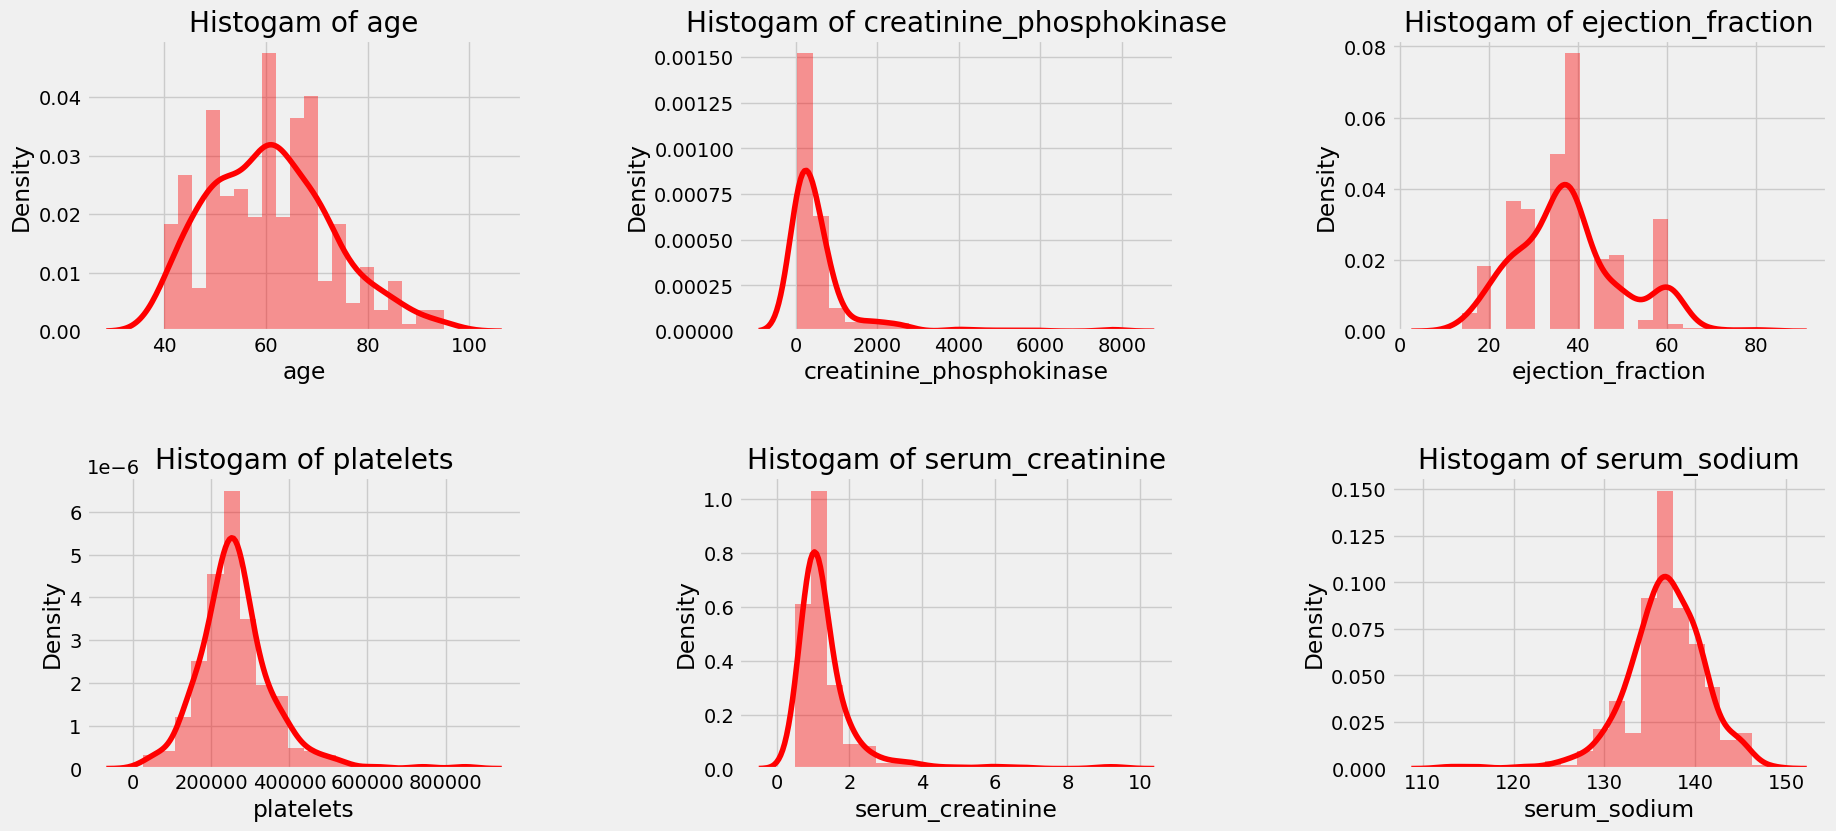

In [8]:
plt.figure(1, figsize = (20,9))
n = 0
for x in contFeat:
    
    n += 1
    plt.subplot(2 , 3 , n )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20 , color = 'red')
    plt.title('Histogam of {}'.format(x))
    
plt.show()

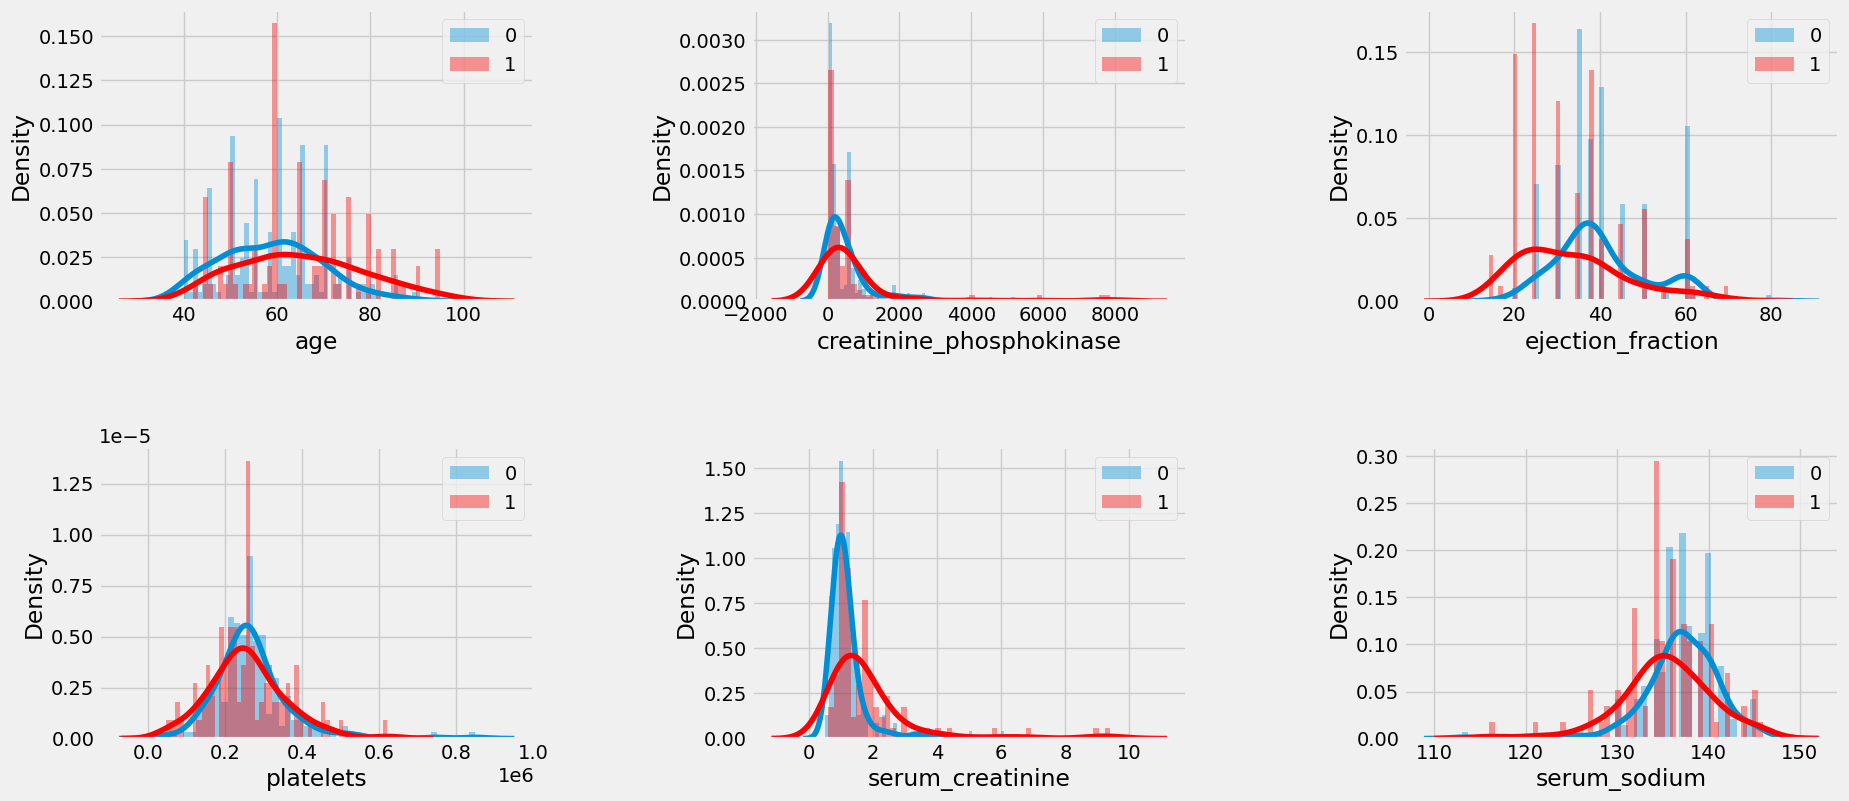

In [9]:
plt.figure(1 , figsize = (20 , 9))
n = 0
for f in contFeat:
    n += 1 
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f][df['DEATH_EVENT'] == 0] , bins = 50 , label = '0')
    sns.distplot(df[f][df['DEATH_EVENT'] == 1] , bins = 50 , color = 'red' , label = '1')
    
    plt.legend()
    
plt.show()

###### Heat Map

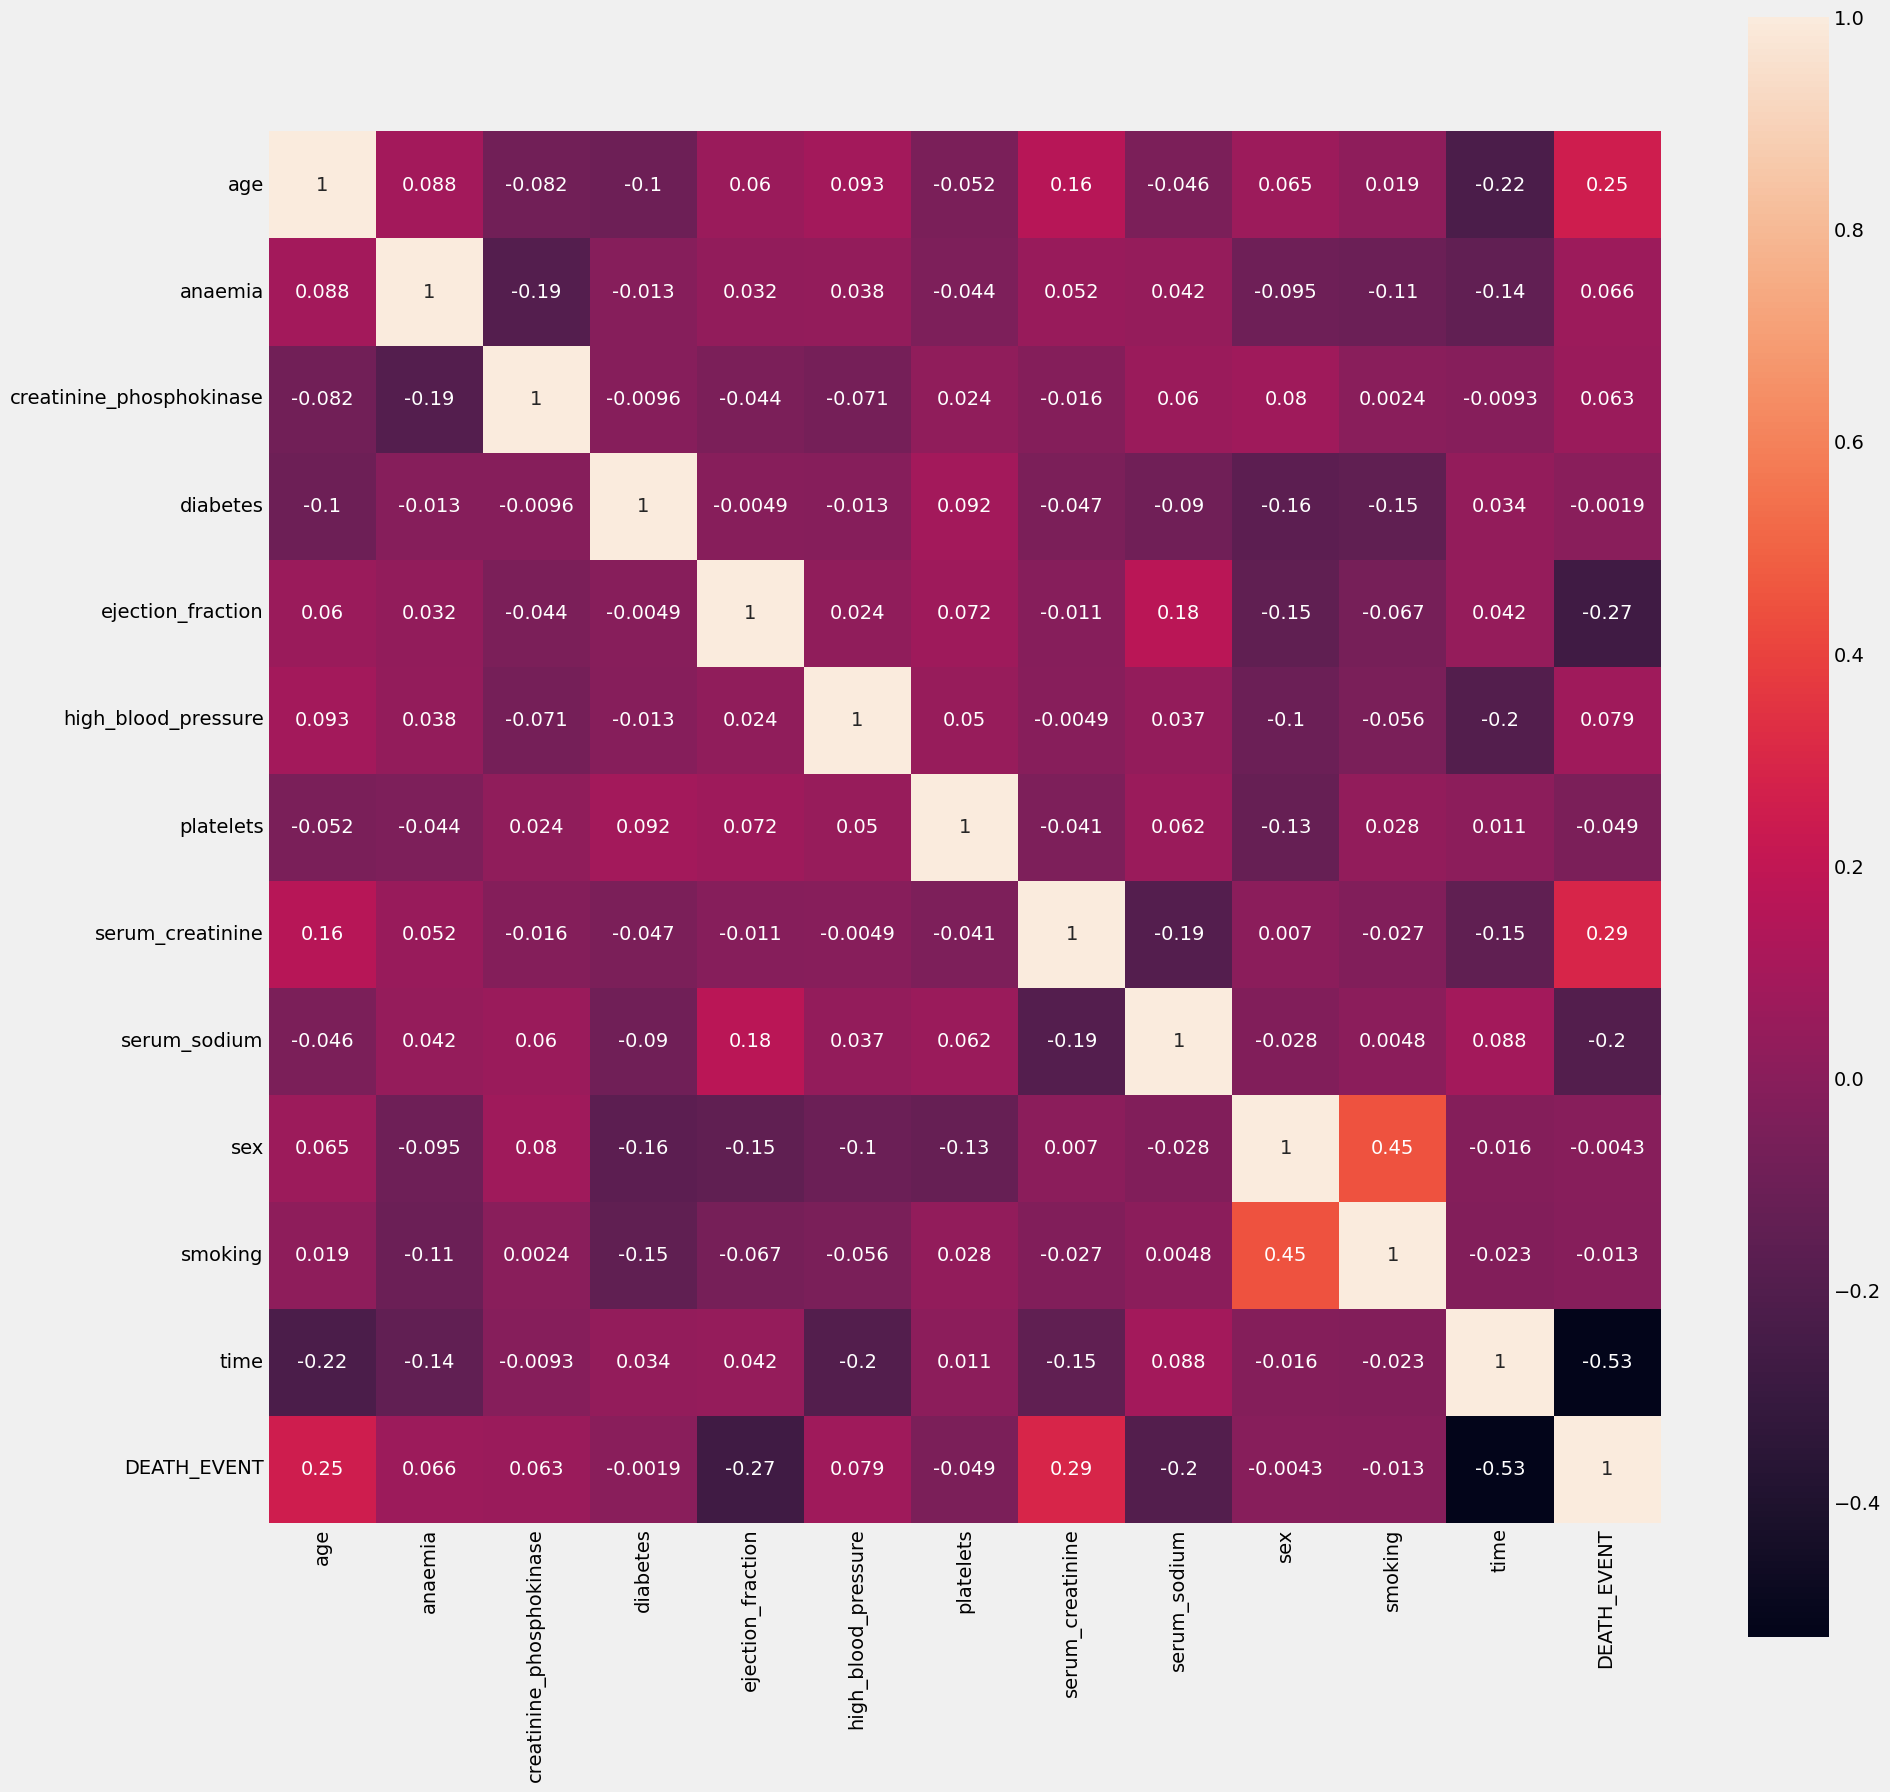

In [10]:
corrmat =  df.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

###### Ejection Fraction

Ejection fraction (EF) measures the amount of blood pumped out of your heart ’s lower chambers, or ventricles. It’s the percentage of blood that leaves your left ventricle when your heart contracts.

A normal ejection fraction is about 50% to 75%, according to the American Heart Association. A borderline ejection fraction can range between 41% and 50%.

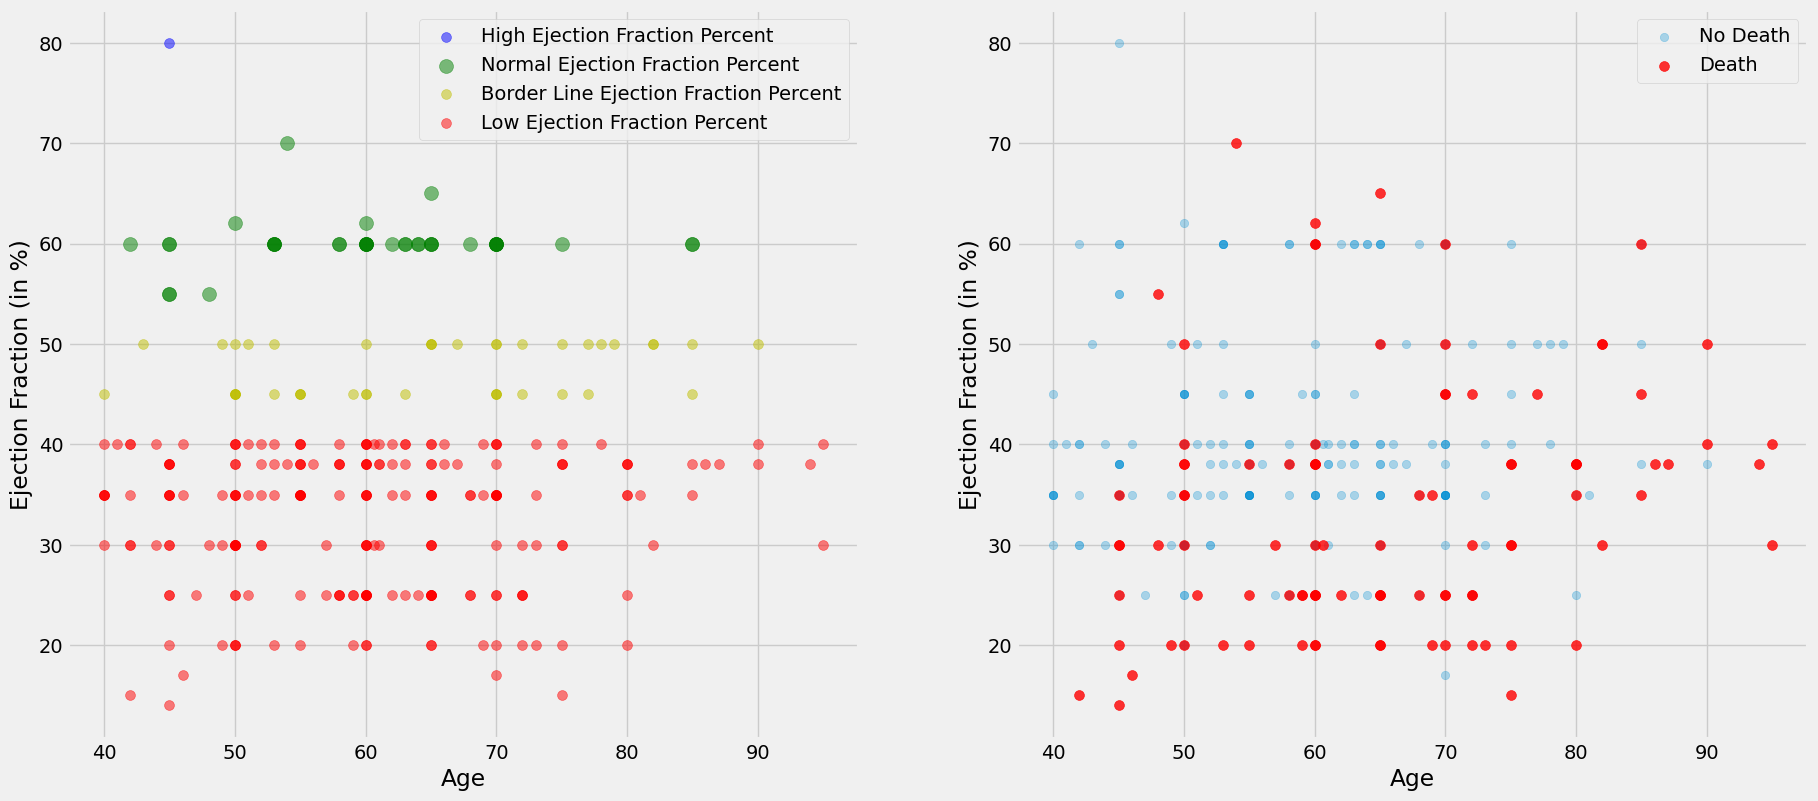

In [11]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''A normal ejection fraction is about 50% to 75%, according to the American Heart Association'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[(df['ejection_fraction'] > 75)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[(df['ejection_fraction'] <= 75) & (df['ejection_fraction'] > 50 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Ejection Fraction Percent')

'''A borderline ejection fraction can range between 41% and 50%'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[(df['ejection_fraction'] <= 50 ) & (df['ejection_fraction'] >= 41)] , 
            color = 'y' , s = 50 , alpha = 0.5 , label = 'Border Line Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[(df['ejection_fraction'] <= 40 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Low Ejection Fraction Percent')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[df['DEATH_EVENT'] == 0 ] , label = 'No Death' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[df['DEATH_EVENT'] == 1 ] , label = 'Death' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.show()

###### Platelet Count

A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis. Having less than 150,000 is known as thrombocytopenia.

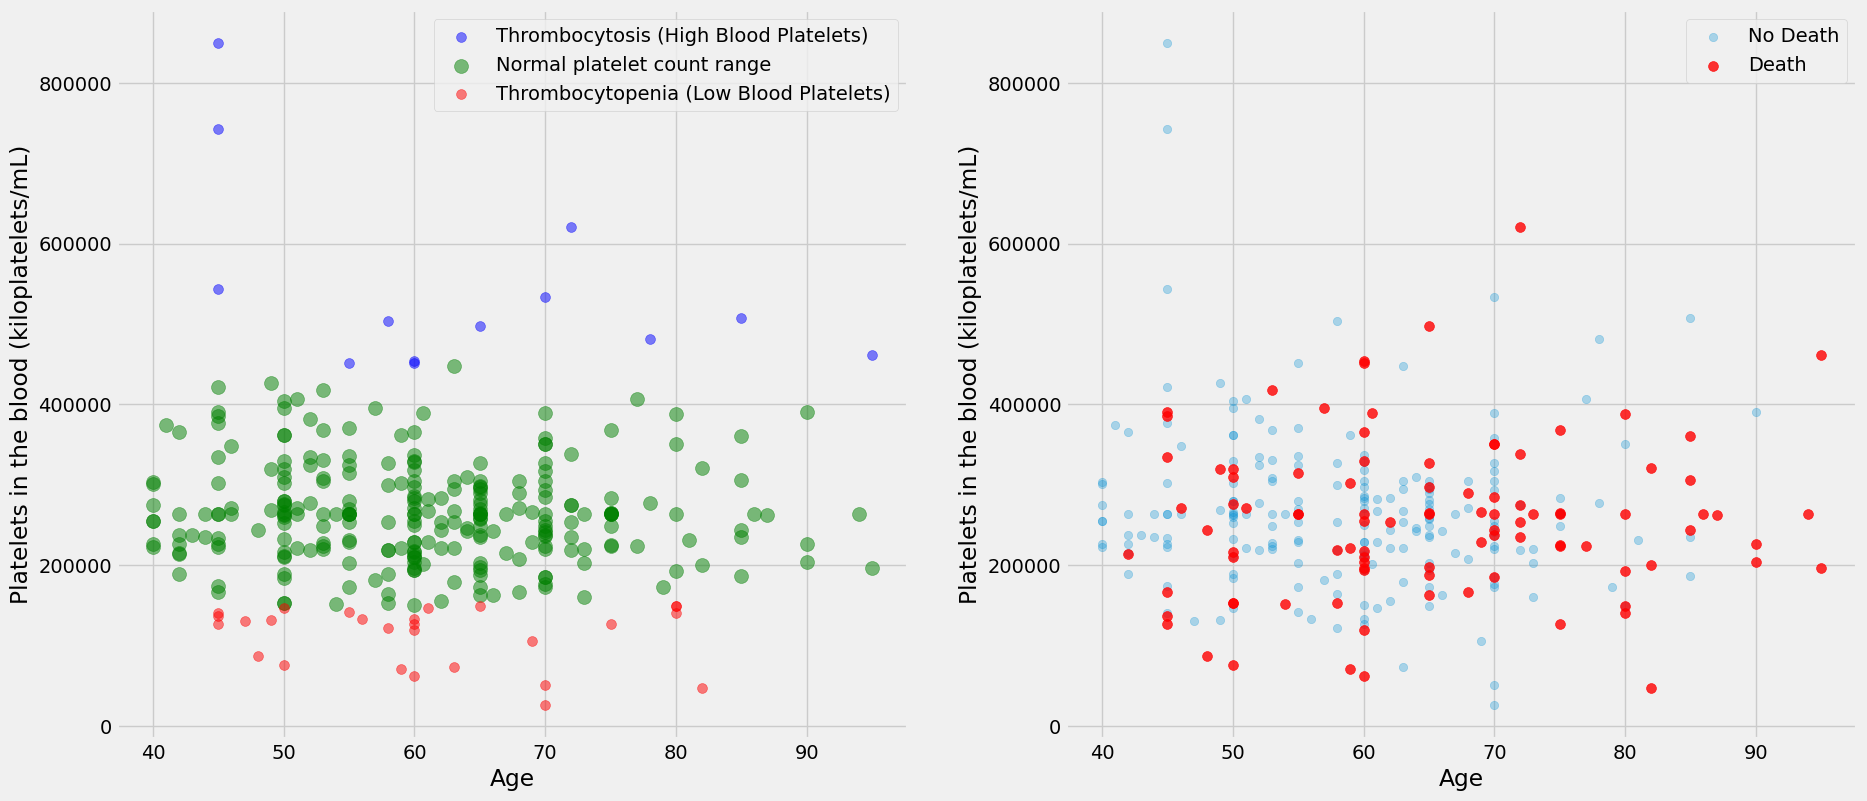

In [12]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.'''
plt.scatter(x = 'age' , y = 'platelets' , data = df[(df['platelets'] > 450001)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'Thrombocytosis (High Blood Platelets)')
plt.scatter(x = 'age' , y = 'platelets' , data = df[(df['platelets'] <= 450000) & (df['platelets'] >= 150000 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal platelet count range')
plt.scatter(x = 'age' , y = 'platelets' , data = df[(df['platelets'] < 150000 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Thrombocytopenia (Low Blood Platelets)')
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'platelets' , data = df[df['DEATH_EVENT'] == 0 ] , label = 'No Death' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'platelets' , data = df[df['DEATH_EVENT'] == 1 ] , label = 'Death' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.show()

###### Blood Sodium Level

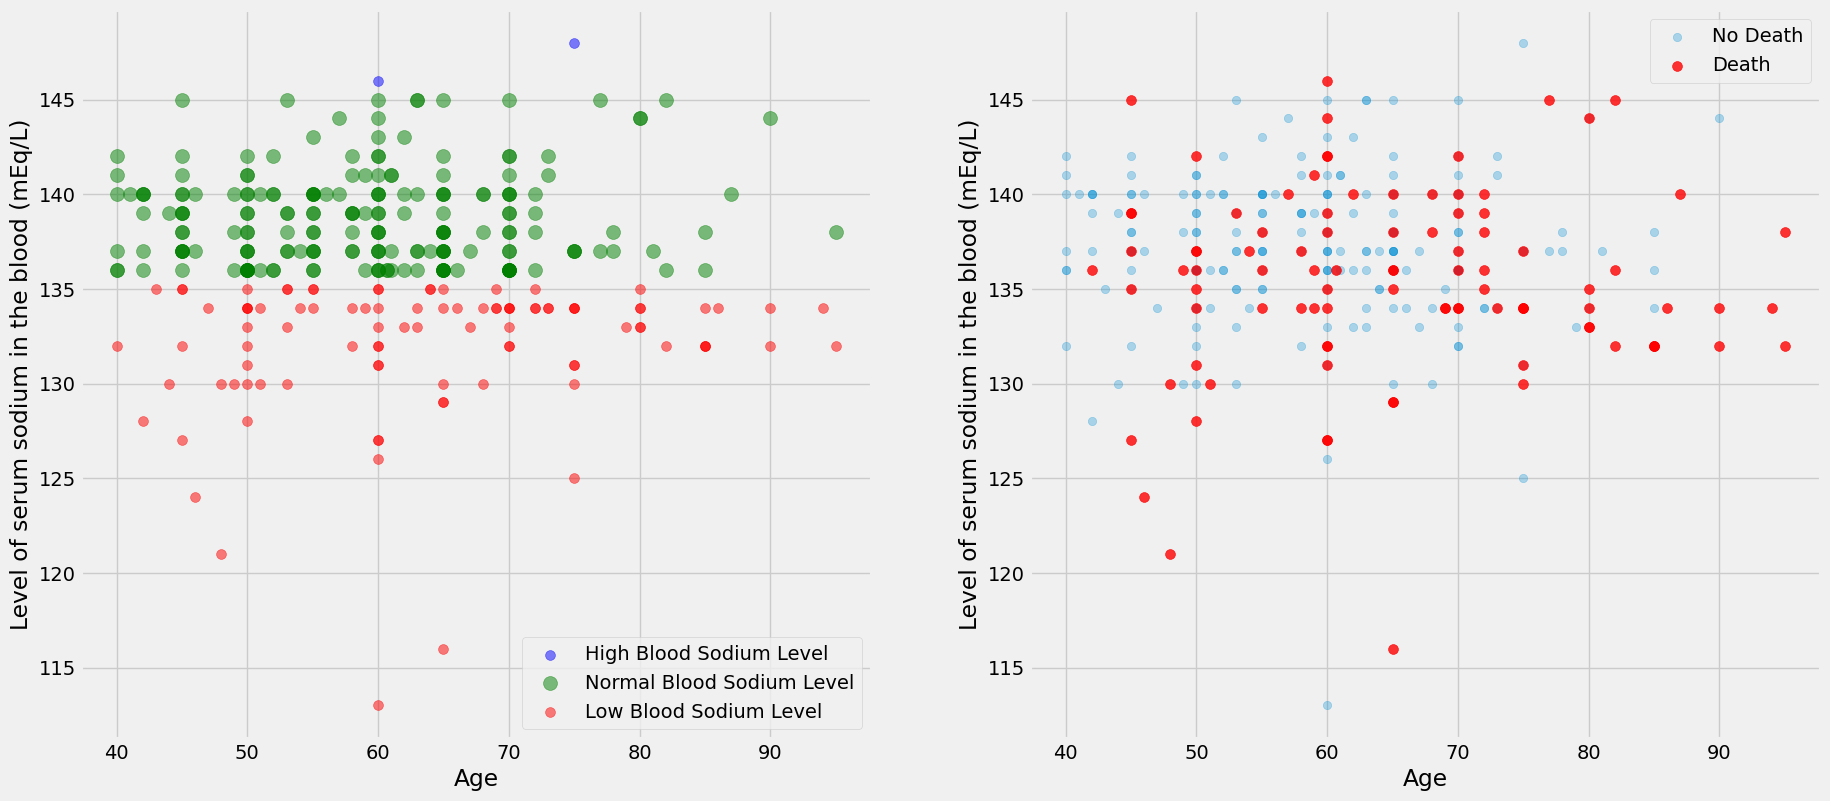

In [13]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''normal blood sodium levels range from 135 to 145 mEq/L.'''
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[(df['serum_sodium'] > 145)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Blood Sodium Level ')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[(df['serum_sodium'] <= 145) & (df['serum_sodium'] > 135 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Blood Sodium Level')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[(df['serum_sodium'] <= 135 )] , 
            color = 'r' , s = 50 , alpha = 0.5 , label = 'Low Blood Sodium Level')

plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[df['DEATH_EVENT'] == 0 ] , label = 'No Death' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[df['DEATH_EVENT'] == 1 ] , label = 'Death' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.show()

###### Predictive Modeling

In [14]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values 

xtrain , xtest , ytrain , ytest = tt(x , y ,test_size=0.1,random_state=20)

###### Linear Support Vector Machine Classifier

In [1]:
'''Linear SVC i.e No Kernal Trick'''
linear_svc = Pipeline(steps = [('scaler' , StandardScaler()) , 
                               ('linear_svc' , LinearSVC(loss = 'hinge'))])

parameters_linear = { 'linear_svc__C' : [0.0005 , 0.005 , 0.05 , 0.5 , 1 , 1.5 , 2 , 5] }

linearsvcGrid = grid(linear_svc , parameters_linear)

linearsvcGrid.fit(xtrain , ytrain)

NameError: name 'Pipeline' is not defined

In [16]:
linearsvcGrid.cv_results_

{'mean_fit_time': array([0.00160847, 0.00188022, 0.00159583, 0.00159516, 0.0017952 ,
        0.00159564, 0.00320544, 0.00387192]),
 'std_fit_time': array([0.00047273, 0.00089361, 0.0004886 , 0.00048825, 0.00039895,
        0.00079782, 0.00397712, 0.00537733]),
 'mean_score_time': array([0.00059867, 0.00071044, 0.00059977, 0.00039897, 0.00039892,
        0.0006115 , 0.        , 0.00019965]),
 'std_score_time': array([0.00048881, 0.00039296, 0.00048971, 0.00048864, 0.00048858,
        0.00049985, 0.        , 0.0003993 ]),
 'param_linear_svc__C': masked_array(data=[0.0005, 0.005, 0.05, 0.5, 1, 1.5, 2, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'linear_svc__C': 0.0005},
  {'linear_svc__C': 0.005},
  {'linear_svc__C': 0.05},
  {'linear_svc__C': 0.5},
  {'linear_svc__C': 1},
  {'linear_svc__C': 1.5},
  {'linear_svc__C': 2},
  {'linear_svc__C': 5}],
 'split0_test_score': array([0.77777778, 0

In [17]:
linearsvcGrid.best_params_

{'linear_svc__C': 1}

In [18]:
linear_svc = Pipeline(steps = [('scaler' , StandardScaler()) , ('linear_svc' , LinearSVC(C = 1 , loss = 'hinge'))])
linear_svc.fit(xtrain , ytrain)
yPred_LinearSVC = linear_svc.predict(xtest)

###### Evaluating the Results from Linear SVC Model

In [19]:
print(confusion_matrix(ytest , yPred_LinearSVC))
print('')
print('Accuracy : {}'.format(accuracy_score(ytest , yPred_LinearSVC)))
print('')
print('Classification Report : \n{}'.format(classification_report(ytest , yPred_LinearSVC)))

[[19  4]
 [ 1  6]]

Accuracy : 0.8333333333333334

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.60      0.86      0.71         7

    accuracy                           0.83        30
   macro avg       0.77      0.84      0.79        30
weighted avg       0.87      0.83      0.84        30



###### Non-Linear Support Vector Machine Classifier (Polynomial and Gaussian RBF Kernels)

In [20]:
'''Non Linear SVC'''

kernelSVC = Pipeline(steps = [('scaler' , StandardScaler()) ,('svc' , SVC())])

parameters = {'svc__kernel': ['poly' , 'rbf'] , 'svc__coef0' : [1] ,'svc__C' : [0.005 , 0.05 , 0.5 , 1 , 1.5 ] ,
              'svc__degree' : [2 , 3 , 10 ],'svc__gamma' : [0.5 , 1 , 5 , 10 ]}

SupportVM_Classifier_grid = grid(kernelSVC , parameters)
SupportVM_Classifier_grid.fit(xtrain , ytrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.005, 0.05, 0.5, 1, 1.5],
                         'svc__coef0': [1], 'svc__degree': [2, 3, 10],
                         'svc__gamma': [0.5, 1, 5, 10],
                         'svc__kernel': ['poly', 'rbf']})

In [21]:
SupportVM_Classifier_grid.best_params_

{'svc__C': 0.05,
 'svc__coef0': 1,
 'svc__degree': 2,
 'svc__gamma': 0.5,
 'svc__kernel': 'poly'}

In [22]:
'''After running Crossvalidation : polynomial kernel performs better on this data than rbf kernel'''

kernelSVC = Pipeline(steps = [('scaler' , StandardScaler()) ,('svc' , SVC(kernel = 'poly' , C = 0.05 , degree = 2))])

kernelSVC.fit(xtrain , ytrain)
yPred_kernel = kernelSVC.predict(xtest)

###### Evaluating the Results from Polynomial Kernel SVC Model

In [23]:
print(confusion_matrix(ytest , yPred_kernel))
print('')
print('Accuracy : {}'.format(accuracy_score(ytest , yPred_kernel)))
print('')
print('Classification Report : \n{}'.format(classification_report(ytest , yPred_kernel)))

[[23  0]
 [ 6  1]]

Accuracy : 0.8

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.14      0.25         7

    accuracy                           0.80        30
   macro avg       0.90      0.57      0.57        30
weighted avg       0.84      0.80      0.74        30



## Conclusion :

Linear SVM Classifier performs better on this Dataset with a recall of 0.86 on positive class. Means that the model is predicting well on the positive class (1 == Death).